In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

Dataset


In [27]:
df = pd.read_excel("random_sample_2.xlsx")

In [28]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,3,Restaurant(<20),1d,Male,51,Unmarried partner,...,4,4,3,2,1,0,0,0,1,1
1,No Urgent Place,Alone,Sunny,80,2,Restaurant(<20),2h,Male,51,Married partner,...,2,2,2,2,1,0,0,0,1,1
2,No Urgent Place,Friend(s),Sunny,80,3,Coffee House,2h,Male,21,Single,...,2,3,2,1,1,1,0,0,1,0
3,Home,Alone,Sunny,55,4,Bar,1d,Male,21,Single,...,2,4,4,2,1,0,0,1,0,1
4,Home,Alone,Sunny,55,4,Restaurant(20-50),1d,Male,26,Single,...,3,4,2,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Home,Alone,Sunny,80,4,Coffee House,1d,Male,21,Single,...,1,4,2,1,1,0,0,0,1,0
4996,No Urgent Place,Kid(s),Rainy,55,4,Carry out & Take away,2h,Male,31,Single,...,4,3,3,2,1,1,0,0,1,0
4997,No Urgent Place,Friend(s),Sunny,80,3,Restaurant(<20),2h,Male,21,Unmarried partner,...,2,4,3,2,1,1,0,0,1,1
4998,Home,Alone,Snowy,30,4,Coffee House,1d,Female,20,Single,...,3,2,4,2,1,1,0,0,1,0


Important varibales

In [29]:
df_imp = df[
    [
        "coupon",
        "CoffeeHouse",
        "passanger",
        "destination",
        "temperature",
        "income",
        "maritalStatus", "Y",
    ]
]
df_imp = df_imp.rename(columns={"Y": "Accept"})

In [30]:
df_imp

,coupon,CoffeeHouse,passanger,destination,temperature,income,maritalStatus,Accept
0,Restaurant(<20),4,Alone,No Urgent Place,55,5,Unmarried partner,1
1,Restaurant(<20),2,Alone,No Urgent Place,80,5,Married partner,1
2,Coffee House,2,Friend(s),No Urgent Place,80,9,Single,0
3,Bar,2,Alone,Home,55,2,Single,1
4,Restaurant(20-50),3,Alone,Home,55,8,Single,0
...,...,...,...,...,...,...,...,...
4995,Coffee House,1,Alone,Home,80,5,Single,0
4996,Carry out & Take away,4,Kid(s),No Urgent Place,55,4,Single,0
4997,Restaurant(<20),2,Friend(s),No Urgent Place,80,1,Unmarried partner,1
4998,Coffee House,3,Alone,Home,30,1,Single,0


In [31]:
df_imp_mini = df_imp.sample(30) # 30 random samples

In [32]:
df_imp_mini

,coupon,CoffeeHouse,passanger,destination,temperature,income,maritalStatus,Accept
585,Restaurant(20-50),1,Partner,No Urgent Place,80,7,Married partner,1
3302,Restaurant(<20),1,Friend(s),No Urgent Place,80,9,Single,1
3676,Carry out & Take away,4,Alone,Home,30,3,Single,1
2621,Restaurant(<20),2,Alone,Home,80,3,Unmarried partner,0
4192,Coffee House,5,Alone,Work,80,6,Single,0
3710,Coffee House,2,Alone,Home,80,1,Unmarried partner,0
1462,Coffee House,1,Alone,Work,80,1,Married partner,0
3240,Coffee House,1,Friend(s),No Urgent Place,80,4,Single,0
941,Carry out & Take away,2,Friend(s),No Urgent Place,80,4,Single,1
562,Bar,2,Alone,Home,55,3,Unmarried partner,1


# Graph 1

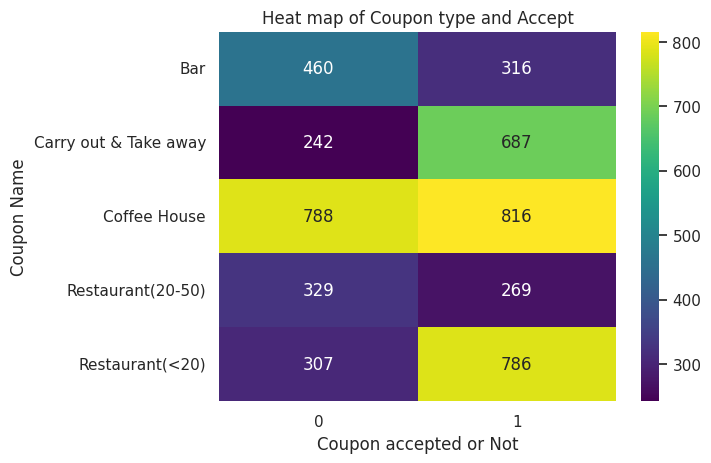

In [33]:
table = pd.crosstab(df_imp["coupon"], df_imp["Accept"])

# Heatmap

sns.set_palette(palette=sns.color_palette("flare"))


g1 = sns.heatmap(table, annot=True, fmt="d", cmap="viridis").set(
    title="Heat map of Coupon type and Accept",xlabel="Coupon accepted or Not",ylabel="Coupon Name"
)


# Graph 2

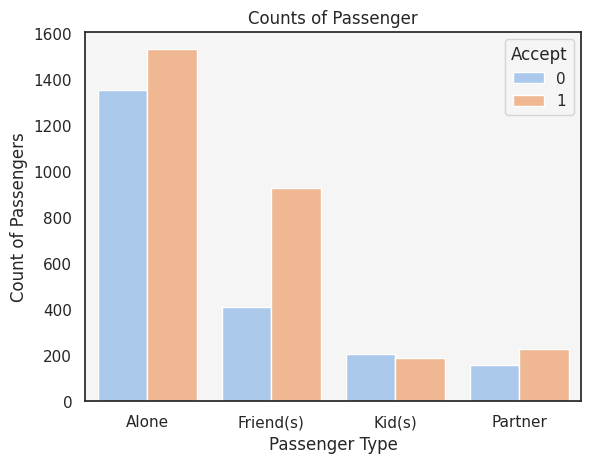

In [56]:
#Count Plot
sns.set_palette(palette=sns.color_palette("pastel"))
g2 = sns.countplot(
    x="passanger",
    hue="Accept",
    data=df_imp,
).set(title="Counts of Passenger",xlabel = "Passenger Type",ylabel="Count of Passengers")

# Graph 3

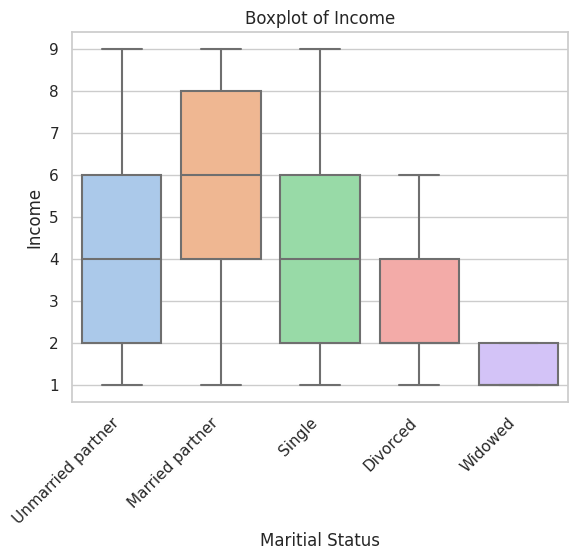

In [57]:
# Box Plot
sns.set(style="whitegrid")

colors = sns.color_palette("pastel")

g3 = sns.boxplot(x="maritalStatus", y="income", data=df_imp, palette=colors)

g3.set_xticklabels(g3.get_xticklabels(), rotation=45, horizontalalignment="right")
g3.set(ylabel="Income",xlabel="Maritial Status",title="Boxplot of Income")
plt.show()

# Graph 4

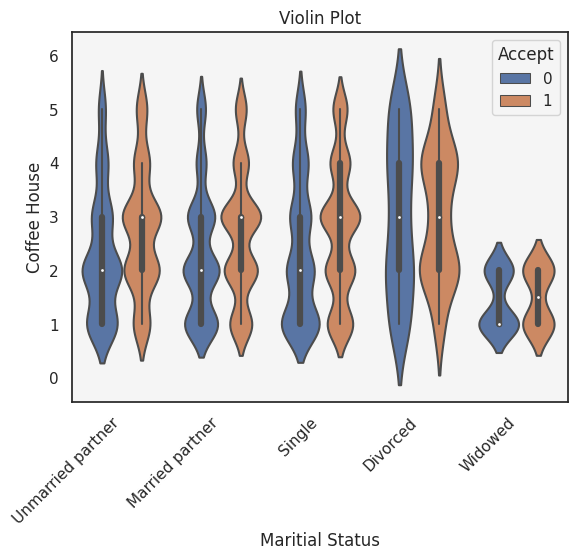

In [63]:
# Violin Plot
sns.set_style("white", {"axes.facecolor": "f5f5f5"})
g4 = sns.violinplot(
    x="maritalStatus", y="CoffeeHouse", hue="Accept", data=df_imp
)
g4.set_xticklabels(g3.get_xticklabels(), rotation=45, horizontalalignment="right")
g4.set(ylabel="Coffee House", xlabel="Maritial Status", title="Violin Plot")
plt.show()

Dashboard

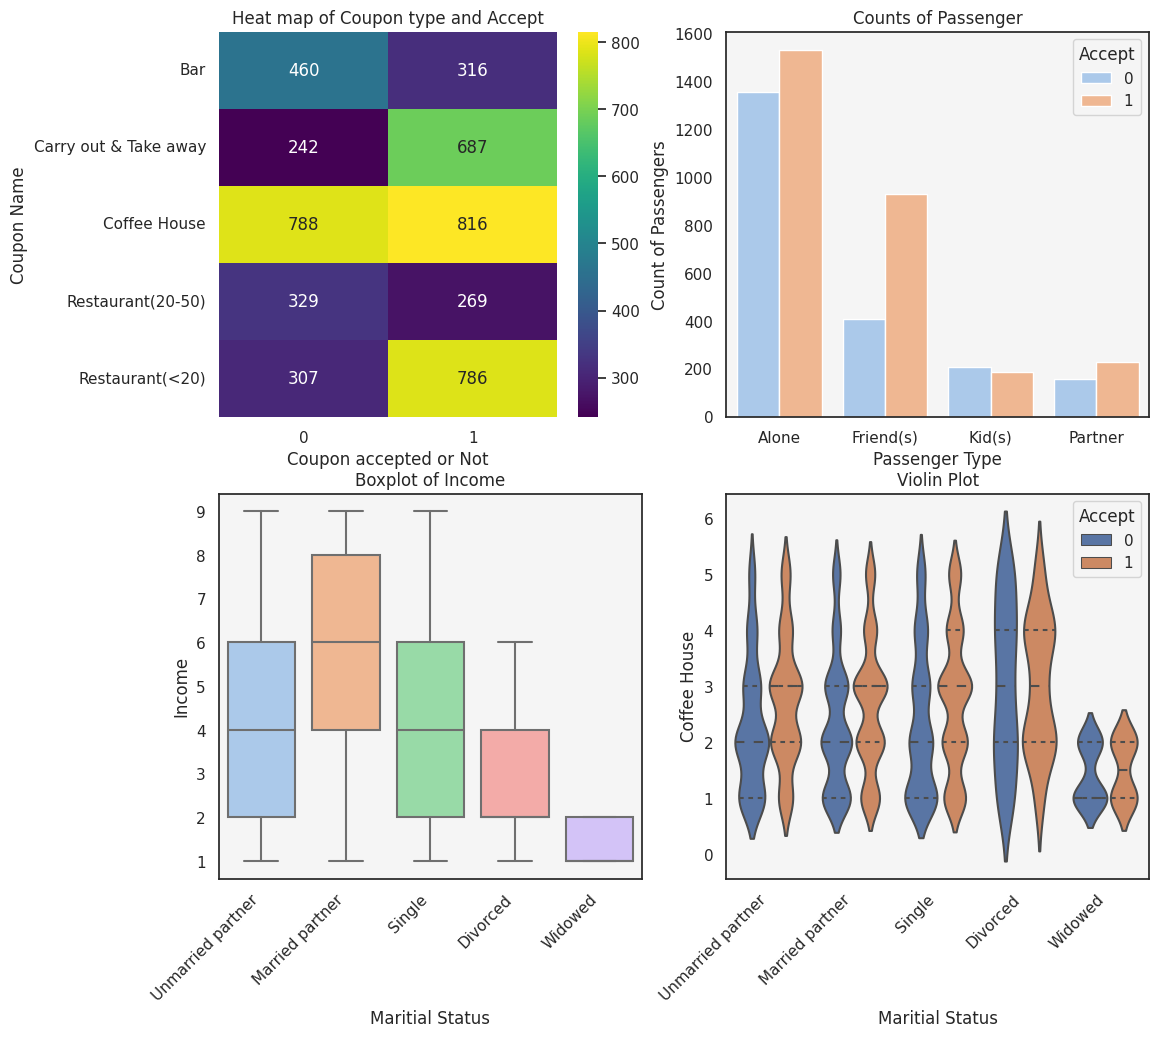

In [62]:

f,ax=plt.subplots(2,2,figsize=(12,11))

#Plot[0,0]
sns.set_palette(palette=sns.color_palette("flare"))

g1 = sns.heatmap(table, annot=True, fmt="d", cmap="viridis",ax=ax[0,0]).set(
    title="Heat map of Coupon type and Accept",xlabel="Coupon accepted or Not",ylabel="Coupon Name"
)


#Plot[0,1]
sns.set_palette(palette=sns.color_palette("pastel"))
g2 = sns.countplot(
    x="passanger",
    hue="Accept",
    data=df_imp,ax=ax[0,1]
).set(title="Counts of Passenger",xlabel = "Passenger Type",ylabel="Count of Passengers")

#Plot[1,0]
sns.set(style="whitegrid")

colors = sns.color_palette("pastel")

g3 = sns.boxplot(x="maritalStatus", y="income", data=df_imp, palette=colors,ax=ax[1,0])

g3.set_xticklabels(g3.get_xticklabels(), rotation=45, horizontalalignment="right")
g3.set(ylabel="Income",xlabel="Maritial Status",title="Boxplot of Income")

#Plot[1,1]
sns.set_style("white", {"axes.facecolor": "f5f5f5"})
g4 = sns.violinplot(
    x="maritalStatus", y="CoffeeHouse", hue="Accept", inner="quart", data=df_imp,ax=ax[1,1]
)
g4.set_xticklabels(g3.get_xticklabels(), rotation=45, horizontalalignment="right")
g4.set(ylabel="Coffee House", xlabel="Maritial Status", title="Violin Plot")
plt.show()